<a href="https://colab.research.google.com/github/UdayG01/Sentiment-Analysis-NLP/blob/main/LexiconSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lexicon Based Sentiment Analysis

* What I briefed from the lexicon-based sentimental analysis is that, lexicons are like static dictionaries, containing some rules and mappings about which tokens or phrases or words are equivalent to what sentiment.

* Since these dictionaries store individual words/expressions and their following sentiment scores, it becomes difficult to make this system adapt to different nuances of human languages, like when we imply satire. Also they do not take into the account of how scores should be affected when different tokens are present in combination.

* This is where the ML models come-in (where we use SVM, Decision trees, etc are used, SA is modeled as a classification problem - The first step in a machine learning text classifier is to transform the text extraction or text vectorization, and the classical approach has been bag-of-words or bag-of-ngrams with their frequency).


* Some lexicons that I saw were: VADER, AFINN, SentiWordNet and TextBlob. Here, I've implemented VADER and AFINN

* Dataset - (https://www.kaggle.com/datasets/datatattle/coronavirus-tweets)

vader

In [8]:
# ! pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [23]:
#Loading libraries
import numpy as np
import pandas as pd
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
import vaderSentiment

# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [13]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer

df = pd.read_csv("/content/Corona_tweets.csv", encoding="latin1")
df.head()
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [MeNyrbie, Phil_Gahan, Chrisitv, https, t, co,...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, Woolworths, to, give,...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ready, to, go, at, supermarket, during, t...
Name: text, dtype: object

In [15]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1355318 words total, with a vocabulary size of 93958


In [ ]:
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

In [20]:
df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))

df.head()

,User_name,Time,Location,text,description_lengths,scores
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp..."
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com..."
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co..."


In [21]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,User_name,Time,Location,text,description_lengths,scores,compound
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382


In [22]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')
df['Sentiment'] = df['compound'].apply(Sentimnt)


df.head()

,User_name,Time,Location,text,description_lengths,scores,compound,Sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,Positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,Positive
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com...",0.8456,Positive
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co...",0.5382,Positive


<Axes: xlabel='Sentiment', ylabel='count'>

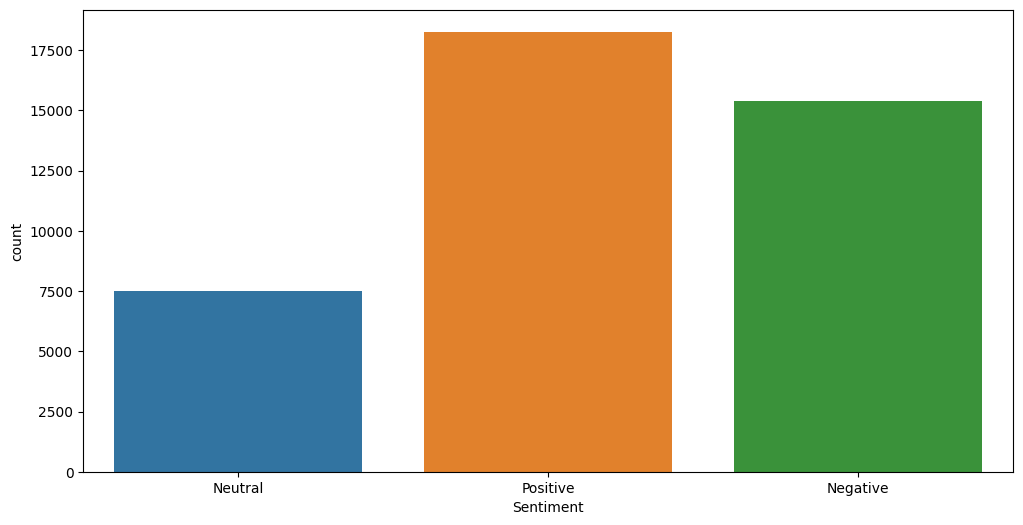

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df)

afinn

In [1]:
# ! pip install afinn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 811.2 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53428 sha256=31a5ef7a0e2db74323a59a8d2fd5d8d7bbb6133974150d29f6d93a1e5e90ddc8
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [31]:
from afinn import Afinn
import pandas as pd

df = pd.read_csv("/content/Corona_tweets.csv", encoding="latin1")
df.head()
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['text'].apply(tokenizer.tokenize)
words_descriptions.head()

af = Afinn()


# Compute sentiment scores and categories
df['scores'] = df['text'].apply(lambda review: af.score(review))
df['sentiment'] = ['positive' if score > 0 else 'negative' if score < 0 else 'neutral' for score in df['scores']]
df.head()

,User_name,Time,Location,text,scores,sentiment
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0.0,neutral
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,1.0,positive
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,0.0,neutral
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,0.0,neutral
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",-7.0,negative


<Axes: xlabel='sentiment', ylabel='count'>

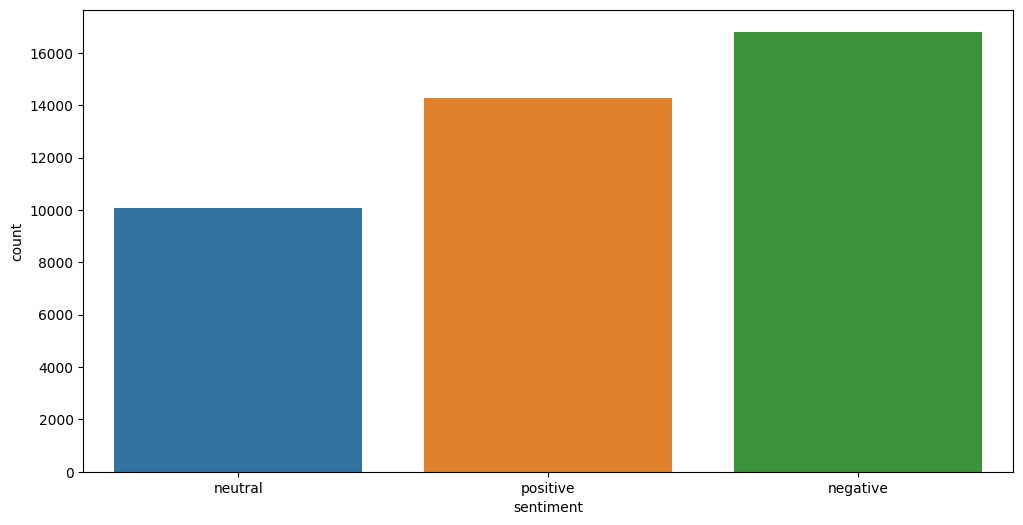

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

So while VADER was returning a dict of scores for pos, neg, neu, and we had to compute the aggregate output explicitly, AFINN is returning the aggregated output implicitly.